In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df.drop(['EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS', ], axis=1, inplace=True)


In [4]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
# YOUR CODE GOES HERE
application_types = application_df['APPLICATION_TYPE'].value_counts()
application_types

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

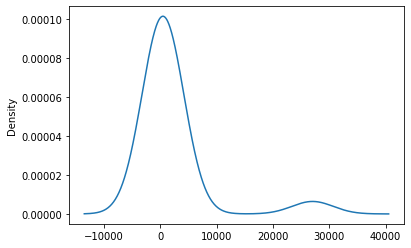

In [6]:
# Visualize the value counts of APPLICATION_TYPE
# YOUR CODE GOES HERE
application_types.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(application_types[application_types < 500].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classification_values = application_df['CLASSIFICATION'].value_counts()
classification_values

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1580        1
C1820        1
C1732        1
C2380        1
C1900        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

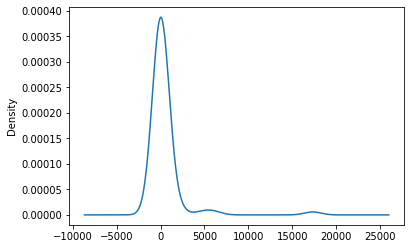

In [9]:

# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
classification_values.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(classification_values[classification_values < 500].index)
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_category = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_category

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [24]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_category]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(app_category)
encode_df.head()

KeyError: "None of [Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',\n       'ORGANIZATION', 'INCOME_AMT'],\n      dtype='object')] are in the [columns]"

In [25]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df, left_index=True,right_index=True)
application_df = application_df.drop(columns = application_category)
application_df.head()

KeyError: "['APPLICATION_TYPE' 'AFFILIATION' 'CLASSIFICATION' 'USE_CASE'\n 'ORGANIZATION' 'INCOME_AMT'] not found in axis"

In [26]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [27]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Deliverable 3: Compile, Train and Evaluate the Model
Attempt 1
Must be atleast better than values below. Loss: 0.6961942911148071, Accuracy: 0.5940524935722351

Add third layer
double number of neurons

In [28]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)

#saves every 5 minutes
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 10
nn1 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
#  YOUR CODE GOES HERE
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
#  YOUR CODE GOES HERE
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                3232      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 3,523
Trainable params: 3,523
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
#  YOUR CODE GOES HERE
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

In [32]:
# Train the model
#  YOUR CODE GOES HERE
fit_mod = nn1.fit(
    X_train, y_train, epochs=50, callbacks=[cp_callback], validation_split=0.2
)

Epoch 1/50
644/644 [==============================] - 1s 1ms/step - loss: 9919.3457 - accuracy: 0.4975 - val_loss: 2629.5652 - val_accuracy: 0.4690

Epoch 00001: saving model to checkpoints\weights.01.hdf5
Epoch 2/50
644/644 [==============================] - 1s 855us/step - loss: 10353.1055 - accuracy: 0.4968 - val_loss: 403.5624 - val_accuracy: 0.5055

Epoch 00002: saving model to checkpoints\weights.02.hdf5
Epoch 3/50
644/644 [==============================] - 1s 940us/step - loss: 931.1779 - accuracy: 0.5302 - val_loss: 1702.0760 - val_accuracy: 0.4690

Epoch 00003: saving model to checkpoints\weights.03.hdf5
Epoch 4/50
644/644 [==============================] - 1s 1ms/step - loss: 5251.7529 - accuracy: 0.5270 - val_loss: 16989.3926 - val_accuracy: 0.4690

Epoch 00004: saving model to checkpoints\weights.04.hdf5
Epoch 5/50
644/644 [==============================] - 1s 1ms/step - loss: 5890.8154 - accuracy: 0.5070 - val_loss: 17.1510 - val_accuracy: 0.5285

Epoch 00005: saving model

644/644 [==============================] - 1s 885us/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310

Epoch 00041: saving model to checkpoints\weights.41.hdf5
Epoch 42/50
644/644 [==============================] - 1s 859us/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310

Epoch 00042: saving model to checkpoints\weights.42.hdf5
Epoch 43/50
644/644 [==============================] - 1s 842us/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310

Epoch 00043: saving model to checkpoints\weights.43.hdf5
Epoch 44/50
644/644 [==============================] - 1s 846us/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310

Epoch 00044: saving model to checkpoints\weights.44.hdf5
Epoch 45/50
644/644 [==============================] - 1s 857us/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310

Epoch 00045: saving model to checkpoints\weights.45.hd

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6637 - accuracy: 0.5670
Loss: 0.663719654083252, Accuracy: 0.5669971108436584


In [34]:
nn1.save('AlphabetSoupCharity-opt1.h5')

<AxesSubplot:>

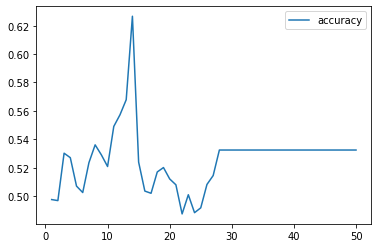

In [35]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_mod.history, index=range(1,len(fit_mod.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")

<AxesSubplot:>

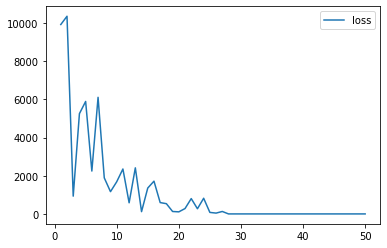

In [36]:
history_df.plot(y="loss")

# Optimization Attempt 2
Keep layer 3
increase number of neurons
Change second layer activation to "sigmoid"

In [37]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  40
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
nn2 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))
# Second hidden layer
#  YOUR CODE GOES HERE
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
#  YOUR CODE GOES HERE
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 40)                8080      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 9,341
Trainable params: 9,341
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile the model
#  YOUR CODE GOES HERE
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
# Train the model
#  YOUR CODE GOES HERE
fit_mod = nn2.fit(
    X_train, y_train, epochs=50, callbacks=[cp_callback], validation_split=0.2
)

Epoch 1/50
644/644 [==============================] - 1s 1ms/step - loss: 0.6917 - accuracy: 0.5318 - val_loss: 0.6912 - val_accuracy: 0.5310

Epoch 00001: saving model to checkpoints\weights.01.hdf5
Epoch 2/50
644/644 [==============================] - 1s 943us/step - loss: 0.6913 - accuracy: 0.5324 - val_loss: 0.6940 - val_accuracy: 0.5310

Epoch 00002: saving model to checkpoints\weights.02.hdf5
Epoch 3/50
644/644 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5324 - val_loss: 0.6914 - val_accuracy: 0.5310

Epoch 00003: saving model to checkpoints\weights.03.hdf5
Epoch 4/50
644/644 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310

Epoch 00004: saving model to checkpoints\weights.04.hdf5
Epoch 5/50
644/644 [==============================] - 1s 981us/step - loss: 0.6912 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310

Epoch 00005: saving model to checkpoints\weights.05.h


Epoch 00041: saving model to checkpoints\weights.41.hdf5
Epoch 42/50
644/644 [==============================] - 1s 967us/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310

Epoch 00042: saving model to checkpoints\weights.42.hdf5
Epoch 43/50
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310

Epoch 00043: saving model to checkpoints\weights.43.hdf5
Epoch 44/50
644/644 [==============================] - 1s 943us/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310

Epoch 00044: saving model to checkpoints\weights.44.hdf5
Epoch 45/50
644/644 [==============================] - 1s 961us/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6913 - val_accuracy: 0.5310

Epoch 00045: saving model to checkpoints\weights.45.hdf5
Epoch 46/50
644/644 [==============================] - 1s 982us/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accu

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7025 - accuracy: 0.4417
Loss: 0.7024994492530823, Accuracy: 0.4417492747306824


<AxesSubplot:>

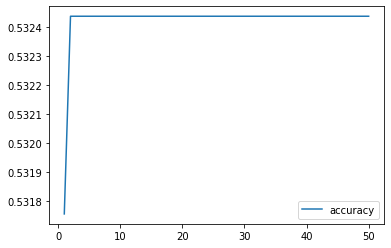

In [41]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_mod.history, index=range(1,len(fit_mod.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")

<AxesSubplot:>

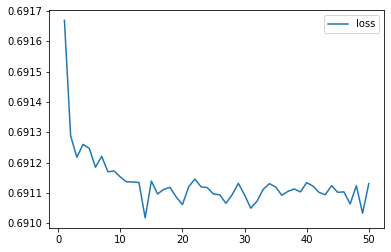

In [42]:

history_df.plot(y="loss")

In [43]:
nn2.save('AlphabetSoupCharity-opt2.h5')

# Optimization Attempt 3
Increase number of neurons further
Remove layer 3
Change the activation for layer 1 to "relu"

In [44]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 80
nn3 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
#  YOUR CODE GOES HERE
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               20200     
_________________________________________________________________
dense_9 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 81        
Total params: 28,361
Trainable params: 28,361
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compile the model
#  YOUR CODE GOES HERE
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [46]:
# Train the model
#  YOUR CODE GOES HERE
fit_mod = nn3.fit(
    X_train, y_train, epochs=50, callbacks=[cp_callback], validation_split=0.2
)

Epoch 1/50
644/644 [==============================] - 1s 2ms/step - loss: 59497.2422 - accuracy: 0.4857 - val_loss: 21071.2637 - val_accuracy: 0.5310

Epoch 00001: saving model to checkpoints\weights.01.hdf5
Epoch 2/50
644/644 [==============================] - 1s 2ms/step - loss: 80542.8281 - accuracy: 0.5026 - val_loss: 18080.0039 - val_accuracy: 0.4690

Epoch 00002: saving model to checkpoints\weights.02.hdf5
Epoch 3/50
644/644 [==============================] - 1s 1ms/step - loss: 49128.7891 - accuracy: 0.5301 - val_loss: 8072.2734 - val_accuracy: 0.4690

Epoch 00003: saving model to checkpoints\weights.03.hdf5
Epoch 4/50
644/644 [==============================] - 1s 1ms/step - loss: 23585.8828 - accuracy: 0.5034 - val_loss: 17864.9551 - val_accuracy: 0.4690

Epoch 00004: saving model to checkpoints\weights.04.hdf5
Epoch 5/50
644/644 [==============================] - 1s 1ms/step - loss: 14915.4521 - accuracy: 0.5173 - val_loss: 855.1783 - val_accuracy: 0.6241

Epoch 00005: saving 

644/644 [==============================] - 1s 923us/step - loss: 0.6914 - accuracy: 0.5324 - val_loss: 0.6913 - val_accuracy: 0.5310

Epoch 00041: saving model to checkpoints\weights.41.hdf5
Epoch 42/50
644/644 [==============================] - 1s 957us/step - loss: 0.6913 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310

Epoch 00042: saving model to checkpoints\weights.42.hdf5
Epoch 43/50
644/644 [==============================] - 1s 923us/step - loss: 0.6912 - accuracy: 0.5324 - val_loss: 0.6914 - val_accuracy: 0.5310

Epoch 00043: saving model to checkpoints\weights.43.hdf5
Epoch 44/50
644/644 [==============================] - 1s 971us/step - loss: 0.6913 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310

Epoch 00044: saving model to checkpoints\weights.44.hdf5
Epoch 45/50
644/644 [==============================] - 1s 961us/step - loss: 0.6913 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310

Epoch 00045: saving model to checkpoints\weights.45.hd

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.7447 - accuracy: 0.6553
Loss: 1.744721531867981, Accuracy: 0.6552769541740417


<AxesSubplot:>

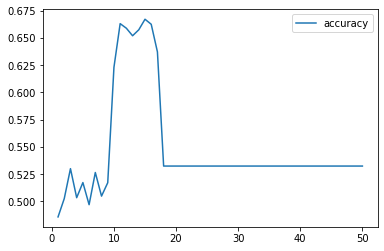

In [48]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_mod.history, index=range(1,len(fit_mod.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")

<AxesSubplot:>

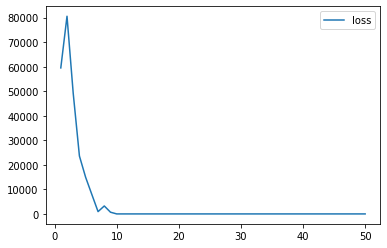

In [49]:
history_df.plot(y="loss")

In [50]:
nn3.save('AlphabetSoupCharity-opt3.h5')